In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ----------------------------------------------------------------------------------------------
# 1. Update the wrangle function for recleaning the data
# ----------------------------------------------------------------------------------------------


def updated_wrangle(
    filepath,
):  # Rerun the 'wrangle' function to get the desired transformed data
    """
    Load and clean the housing data from a CSV file.

    Parameters:
    filepath (str): The path to the CSV file containing the housing data.

    Returns:
    pd.DataFrame: A cleaned DataFrame with the following transformations:
    """
    # Read CSV file into DataFrame and reset index
    df = pd.read_csv(filepath)


    return df

In [ ]:
# ----------------------------------------------------------------------------------------------
# 2. Preview the data and adjust the 'update_wrangle' funtion accordingling
# ----------------------------------------------------------------------------------------------

df = updated_wrangle("../../data/raw/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.shape

(34857, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
def updated_wrangle(
    filepath,
):  # Rerun the 'wrangle' function to get the desired transformed data
    """
    Load and clean the housing data from a CSV file.

    Parameters:
    filepath (str): The path to the CSV file containing the housing data.

    Returns:
    pd.DataFrame: A cleaned DataFrame with the following transformations:
    """
    # Read CSV file into DataFrame and reset index
    df = pd.read_csv(filepath)

    # Rename Lattitude to Latitude
    df.rename(columns={"Lattitude": "Latitude"}, inplace=True)
    # Rename Longtitude to Longitude
    df.rename(columns={"Longtitude": "Longitude"}, inplace=True)

    # Create "price_usd" column from AUD 'Price' column to USD in 2018
    df["Price_USD"] = round(df["Price"] * 0.75, 2)



    return df

In [ ]:
df = updated_wrangle("../../data/raw/Melbourne_housing_FULL.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Latitude       26881 non-null  float64
 18  Longit

In [ ]:
# Calculate missing value proportions and data characteristics
missing_value_report = pd.DataFrame(
    {
        "Count": df.shape[0],
        "Missing Values": df.isnull().sum(),
        "Missing %": (df.isnull().sum() / len(df)) * 100,
        "Cardinality": df.nunique(),
    }
)
missing_value_report

,Count,Missing Values,Missing %,Cardinality
Suburb,34857,0,0.000000,351
Address,34857,0,0.000000,34009
Rooms,34857,0,0.000000,12
Type,34857,0,0.000000,3
Price,34857,7610,21.832057,2871
Method,34857,0,0.000000,9
SellerG,34857,0,0.000000,388
Date,34857,0,0.000000,78
Distance,34857,1,0.002869,215
Postcode,34857,1,0.002869,211


In [ ]:
# Describe 'Numiric' Data
df.select_dtypes("number").describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Price_USD
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000,2.724700e+04
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306,7.876300e+05
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313,4.811003e+05
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000,6.375000e+04
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000,4.762500e+05
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000,6.525000e+05
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000,9.712500e+05
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000,8.400000e+06


In [ ]:
# Describe 'Object' Data
df.select_dtypes("object").describe()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


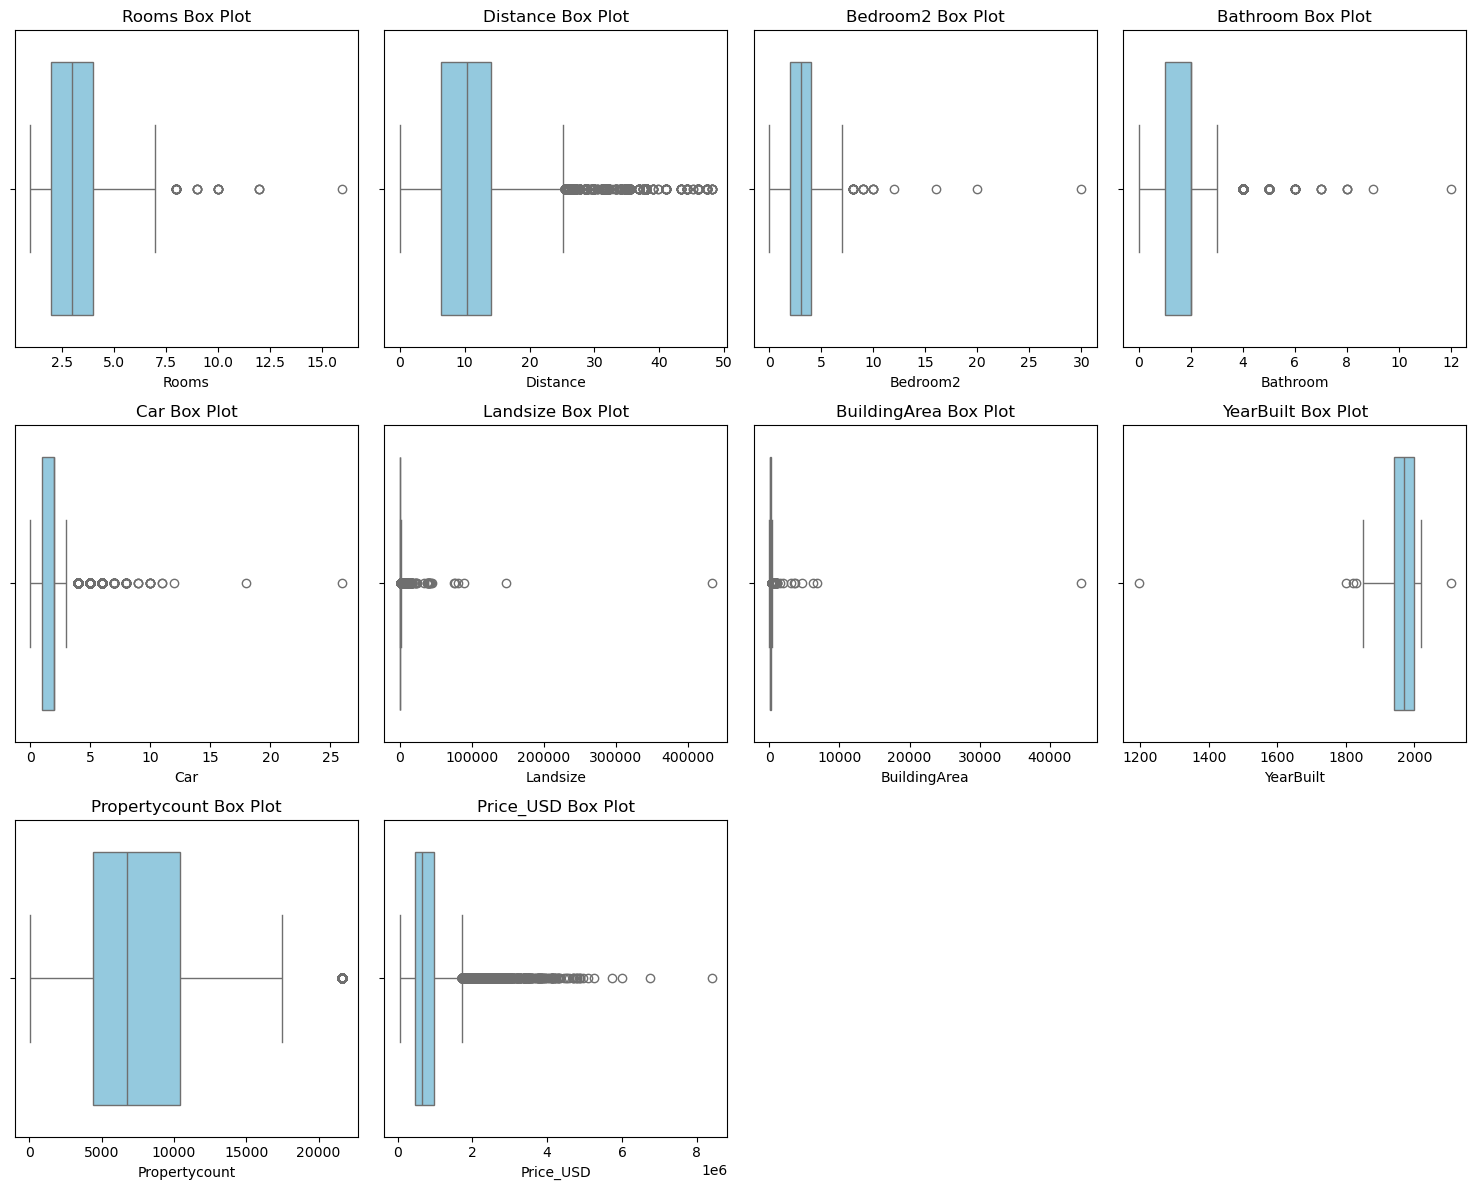

In [ ]:
# ----------------------------------------------------------------------------------------------

# Visualise the selected  numerical columns to identify outliers
numerical_cols = df.select_dtypes("number").drop(
    columns=["Postcode", "Price", "Latitude", "Longitude"]
)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"{col} Box Plot")
plt.tight_layout()
plt.show()

In [ ]:
# Remove 'Numerical' outliers and update the above general function
for col in numerical_cols:
    Q1 = numerical_cols[col].quantile(0.25)
    Q3 = numerical_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask_num = numerical_cols[
        (numerical_cols[col] > lower_bound) & (numerical_cols[col] < upper_bound)
    ]
mask_num

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Price_USD
1,2,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0,1110000.0
2,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,776250.0
4,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,1098750.0
5,3,2.5,3.0,2.0,1.0,94.0,NaN,NaN,4019.0,637500.0
6,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,1200000.0
...,...,...,...,...,...,...,...,...,...,...
34852,4,6.3,4.0,1.0,3.0,593.0,NaN,NaN,6543.0,1110000.0
34853,2,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,6543.0,666000.0
34854,2,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,6543.0,528750.0
34855,3,6.3,NaN,NaN,NaN,NaN,NaN,NaN,6543.0,855000.0


In [ ]:
def updated_wrangle(
    filepath,
):  # Rerun the 'wrangle' function to get the desired transformed data
    """
    Load and clean the housing data from a CSV file.

    Parameters:
    filepath (str): The path to the CSV file containing the housing data.

    Returns:
    pd.DataFrame: A cleaned DataFrame with the following transformations:
    """
    # Read CSV file into DataFrame and reset index
    df = pd.read_csv(filepath)

    # Rename Lattitude to Latitude and Longtitude to Longitude
    df.rename(
        columns={"Lattitude": "Latitude", "Longtitude": "Longitude"}, inplace=True
    )

    # Create "price_usd" column from AUD 'Price' column to USD in 2018
    df["Price_USD"] = round(df["Price"] * 0.75, 2)

    # Define numerical columns to apply outlier filtering selectively
    num_features = df.select_dtypes("number").drop(
        columns=["Postcode", "Price", "Latitude", "Longitude"]
    )

    # Apply IQR outlier removal
    for col in num_features:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)  # 25th percentile
            Q3 = df[col].quantile(0.75)  # 75th percentile
            IQR = Q3 - Q1
            low_bound = Q1 - 1.5 * IQR
            high_bound = Q3 + 1.5 * IQR
            # Apply filtering
            df = df[df[col].between(low_bound, high_bound)]

    return df

In [ ]:
df = updated_wrangle("../../data/raw/Melbourne_housing_FULL.csv")

In [ ]:
df.shape

(7091, 22)

In [ ]:
# Calculate missing value proportions and data characteristics
missing_value_report = pd.DataFrame(
    {
        "Count": df.shape[0],
        "Missing Values": df.isnull().sum(),
        "Missing %": (df.isnull().sum() / len(df)) * 100,
        "Cardinality": df.nunique(),
    }
)
missing_value_report

,Count,Missing Values,Missing %,Cardinality
Suburb,7091,0,0.000000,255
Address,7091,0,0.000000,7000
Rooms,7091,0,0.000000,7
Type,7091,0,0.000000,3
Price,7091,0,0.000000,1512
Method,7091,0,0.000000,5
SellerG,7091,0,0.000000,219
Date,7091,0,0.000000,77
Distance,7091,0,0.000000,163
Postcode,7091,0,0.000000,152


In [ ]:
# Describe 'Numiric' Data
df.select_dtypes("number").describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Price_USD
count,7091.000000,7.091000e+03,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7086.000000,7086.000000,7091.000000,7.091000e+03
mean,2.968693,9.924149e+05,10.188662,3095.124947,2.946975,1.549429,1.495417,395.604146,133.365885,1964.833310,-37.803412,144.988129,7159.460866,7.443111e+05
std,0.891509,4.509076e+05,5.181638,73.173011,0.891273,0.608523,0.711045,268.966618,55.039248,36.207814,0.077560,0.107160,3856.226844,3.381807e+05
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1850.000000,-38.027680,144.611190,389.000000,9.825000e+04
25%,2.000000,6.450000e+05,6.200000,3041.000000,2.000000,1.000000,1.000000,173.000000,96.000000,1940.000000,-37.856400,144.915917,4280.000000,4.837500e+05
50%,3.000000,8.900000e+05,9.400000,3076.000000,3.000000,1.000000,2.000000,388.000000,126.000000,1970.000000,-37.797800,144.991605,6543.000000,6.675000e+05
75%,4.000000,1.280000e+06,13.800000,3146.000000,4.000000,2.000000,2.000000,607.000000,165.000000,1999.000000,-37.753700,145.057343,9704.000000,9.600000e+05
max,7.000000,2.325000e+06,25.200000,3752.000000,7.000000,3.000000,3.000000,1324.000000,302.000000,2018.000000,-37.566920,145.302660,17496.000000,1.743750e+06


In [ ]:
# Describe 'Object' Data
df.select_dtypes("object").describe()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,7091,7091,7091,7091,7091,7091,7091,7091
unique,255,7000,3,5,219,77,26,6
top,Brunswick,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland City Council,Northern Metropolitan
freq,141,3,5055,4535,856,180,590,2160


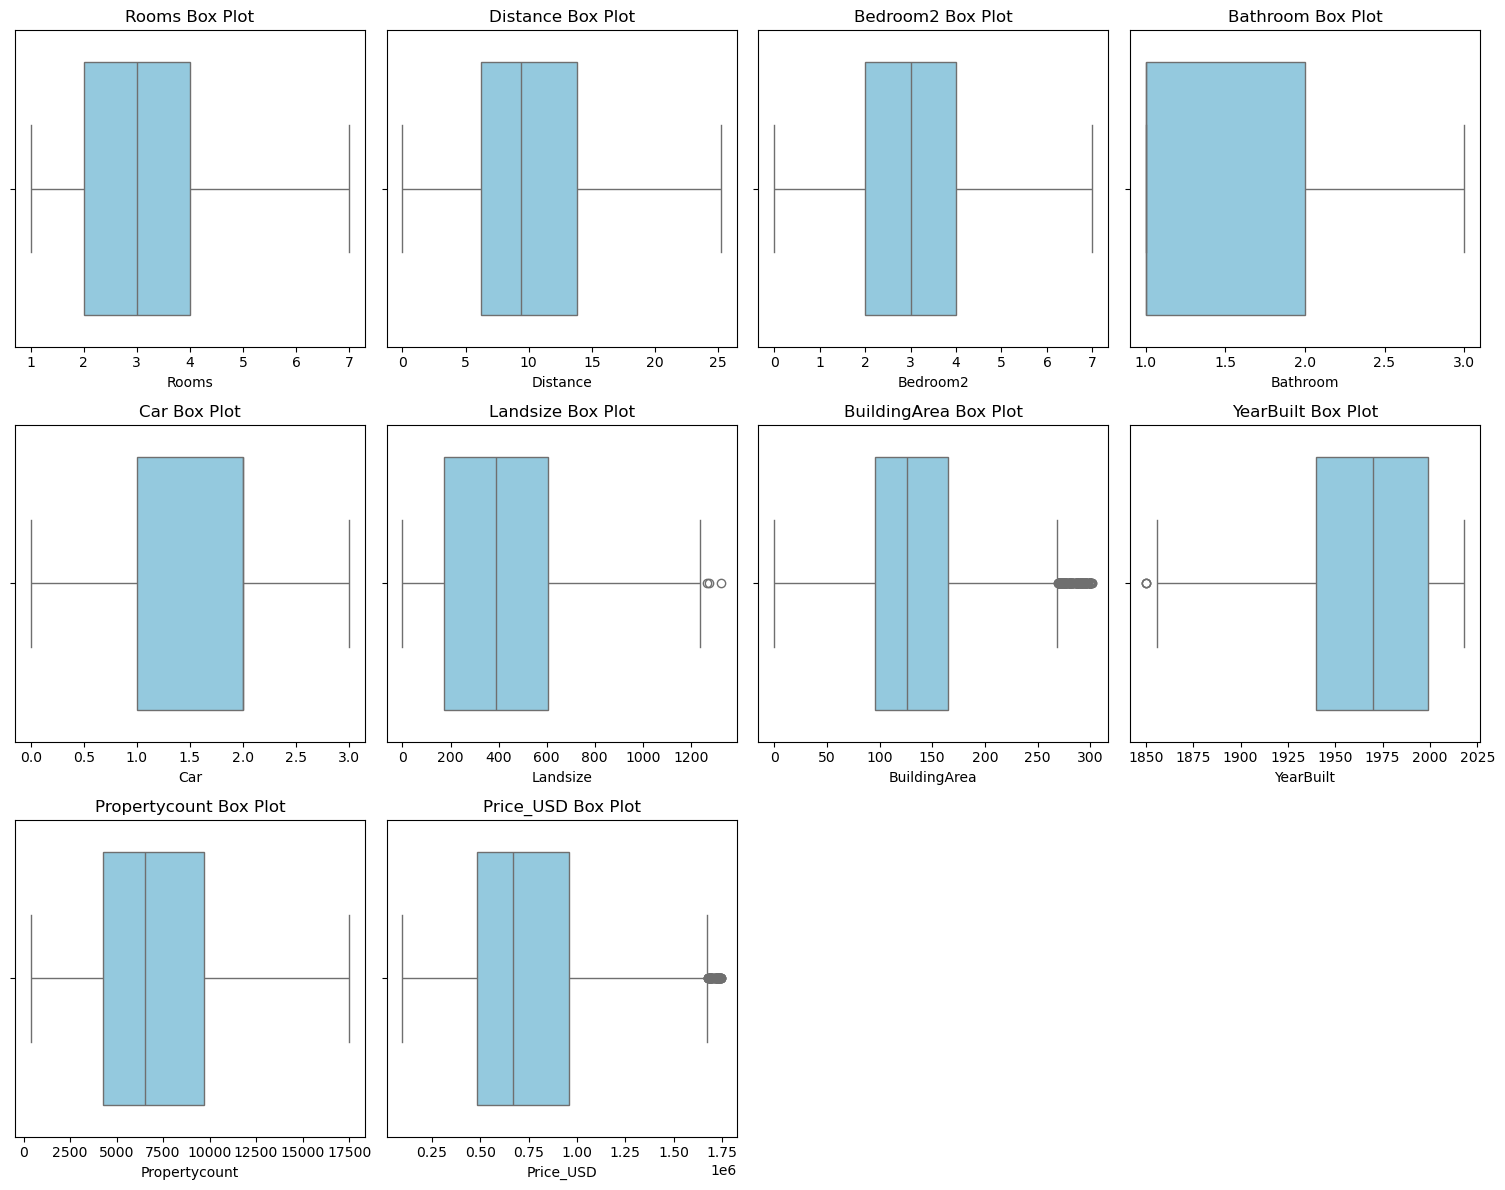

In [ ]:
# ----------------------------------------------------------------------------------------------

# Visualise the numerical columns to recheck the removed outliers
num_features = df.select_dtypes("number").drop(
    columns=["Postcode", "Price", "Latitude", "Longitude"]
)
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color="skyblue")  # Visualise the histogram
    plt.title(f"{col} Box Plot")
plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------------------------------------------------------------------

df["Rooms"].value_counts()

Rooms
3    3229
2    1718
4    1583
1     307
5     236
6      17
7       1
Name: count, dtype: int64

In [ ]:
# Visualise the relationship between 'Rooms' and 'Price_USD'
Rooms = df["Rooms"].value_counts().sort_index()
fig = px.pie(
    names=[
        "1 Room",
        "2 Rooms",
        "3 Rooms",
        "4 Rooms",
        "5 Rooms",
        "6 Rooms",
        "7 Rooms",
    ],
    values=Rooms,
    title="Number of Rooms",
    template="plotly_dark",
).update_traces(textinfo="label+percent")
fig.show()

# Visualise the average price
avg_room_price = df.groupby("Rooms")["Price_USD"].mean()
fig = px.line(
    avg_room_price,
    line_shape="spline",
    markers="*",
    template="plotly_dark",
    labels={"value": "Average Price"},
    color_discrete_sequence=["blue"],
    title="Average Price By Number of Rooms",
)
fig.show()

In [ ]:
# ----------------------------------------------------------------------------------------------

# Visualise the relationship between 'Distance' and 'Price_USD'
avg_price_distance = df.groupby("Distance")["Price_USD"].mean()
fig = px.line(
    avg_price_distance,
    line_shape="spline",
    markers="*",
    template="plotly_dark",
    labels={"value": "Average Price"},
    color_discrete_sequence=["red"],
    title="Average Price By Distance",
)
fig.show()

In [ ]:
# ----------------------------------------------------------------------------------------------

# Visualise the relationship between 'BuildingArea' and 'Price_USD'
avg_price_building_area = df.groupby("BuildingArea")["Price_USD"].mean()
fig = px.line(
    avg_price_building_area,
    line_shape="spline",
    markers="*",
    template="plotly_dark",
    labels={"value": "Average Price"},
    color_discrete_sequence=["blue"],
    title="Average Price By Building Area",
)
fig.show()

In [ ]:
# ----------------------------------------------------------------------------------------------

# Visualise the relationship between 'Lat and Lon' and 'Price_USD'
fig = px.scatter_mapbox(
    df,  # The DataFrame
    lat="Latitude",  # Latitude
    lon="Longitude",  # Longitude
    width=800,  # Width of map
    height=700,  # Height of map
    color="Price_USD",
    template="plotly_dark",
    hover_data=["Price_USD"],  # Display price when hovering mouse over house
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
# ----------------------------------------------------------------------------------------------

# Visualise the distribution of 'Method'
df["Method"].unique()
Method = df["Method"].value_counts()
fig = px.pie(
    values=Method,
    names=[
        "Property Sold",
        "Property Sold Prior",
        "Vendor Bid",
        "Property Passed In",
        "Sold After Auction",
    ],
    template="plotly_dark",
    title="Sale Methods",
).update_traces(textinfo="label+percent")
fig.show()

In [ ]:
# ----------------------------------------------------------------------------------------------

# Visualise the different property types
df["Type"].unique()
property_type = df["Type"].value_counts()
fig = px.pie(
    values=property_type,
    names=["House, Cottage, Villa, Semi, Terrace", "Unit, Duplex", "Townhouse"],
    template="plotly_dark",
    title="Property Types",
).update_traces(textinfo="label+percent")
fig.show()

In [ ]:
# ----------------------------------------------------------------------------------------------

# Check columns for multicollinearity and update the 'updated_wrangle' function
corr = (
    df.select_dtypes("number").drop(columns=["Price_USD", "Postcode", "Price"]).corr()
)
corr

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount
Rooms,1.000000,0.361289,0.964795,0.572744,0.403834,0.512824,0.725871,0.008416,0.069141,0.068864,-0.073594
Distance,0.361289,1.000000,0.366133,0.201477,0.328962,0.476200,0.286248,0.350669,0.026051,0.256771,-0.051062
Bedroom2,0.964795,0.366133,1.000000,0.567074,0.407790,0.507350,0.710889,0.015810,0.071164,0.069141,-0.073063
Bathroom,0.572744,0.201477,0.567074,1.000000,0.332770,0.206995,0.610955,0.241086,-0.023790,0.084153,-0.029766
Car,0.403834,0.328962,0.407790,0.332770,1.000000,0.370571,0.390220,0.230567,0.022801,0.071797,-0.051135
Landsize,0.512824,0.476200,0.507350,0.206995,0.370571,1.000000,0.441548,-0.053114,0.078777,0.159515,-0.087081
BuildingArea,0.725871,0.286248,0.710889,0.610955,0.390220,0.441548,1.000000,0.084561,0.009222,0.079372,-0.070035
YearBuilt,0.008416,0.350669,0.015810,0.241086,0.230567,-0.053114,0.084561,1.000000,0.096378,-0.025707,0.004519
Latitude,0.069141,0.026051,0.071164,-0.023790,0.022801,0.078777,0.009222,0.096378,1.000000,-0.262145,-0.012817
Longitude,0.068864,0.256771,0.069141,0.084153,0.071797,0.159515,0.079372,-0.025707,-0.262145,1.000000,-0.000856


<Axes: >

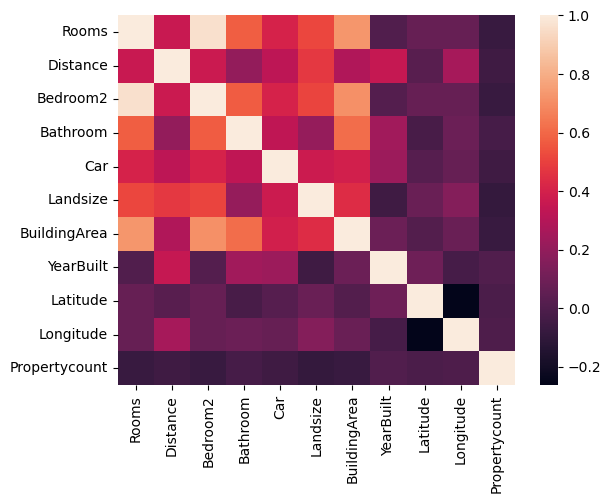

In [ ]:
# Visualise it for better judgement
sns.heatmap(corr)

In [ ]:
# ----------------------------------------------------------------------------------------------
# 1. Update the wrangle function for recleaning the data
# ----------------------------------------------------------------------------------------------


def updated_wrangle(
    filepath,
):  # Rerun the 'wrangle' function to get the desired transformed data
    """
    Load and clean the housing data from a CSV file.

    Parameters:
    filepath (str): The path to the CSV file containing the housing data.

    Returns:
    pd.DataFrame: A cleaned DataFrame with the following transformations:
        - Columns 'Lattitude' and 'Longtitude' are renamed to 'Latitude' and 'Longitude', respectively.
        - A new column 'price_USD' is created by converting 'Price' to USD (assuming a conversionrate of 0.75).
        - Unwanted columns are removed.
        - Outliers are removed, keeping only the properties within the 25th and 75th percentiles.
        - All Properties 'Type' are now included except 'br'.
    """
    # Read CSV file into DataFrame and reset index
    df = pd.read_csv(filepath)

    # Rename Lattitude to Latitude and Longtitude to Longitude
    df.rename(
        columns={"Lattitude": "Latitude", "Longtitude": "Longitude"}, inplace=True
    )

    # Create "price_usd" column from AUD 'Price' column to USD in 2018
    df["Price_USD"] = round(df["Price"] * 0.75, 2)

    # Define numerical columns to apply outlier filtering selectively
    num_features = df.select_dtypes("number").drop(
        columns=["Postcode", "Price", "Latitude", "Longitude"]
    )

    # Apply IQR outlier removal
    for col in num_features:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)  # 25th percentile
            Q3 = df[col].quantile(0.75)  # 75th percentile
            IQR = Q3 - Q1
            low_bound = Q1 - 1.5 * IQR
            high_bound = Q3 + 1.5 * IQR
            # Apply filtering
            df = df[df[col].between(low_bound, high_bound)]

    # Subset to all property type except where 'Type' is 'br' bedroom(s)
    mask_type = df["Type"] != "br"
    df = df[mask_type]

    # Drop low- and high-cardinality categorical variables
    df.drop(
        columns=["Address", "SellerG", "Postcode"],
        inplace=True,
    )
    # Drop columns with multicollinearlity
    df.drop(columns=["Rooms", "Bedroom2", "Bathroom", "Landsize"], inplace=True)
    # Drop leaky and unwanted columns
    df.drop(
        columns=[
            "Price",
            "CouncilArea",
            "Regionname",
            "Distance",
            "Car",
            "Date",
            "Type",
            "Method",
            "YearBuilt",
            "Propertycount",
        ],
        inplace=True,
    )
    df.reset_index(drop=True, inplace=True)

    return df

In [ ]:
# ----------------------------------------------------------------------------------------------
# 2. Preview the data and adjust the 'update_wrangle' funtion accordingling
# ----------------------------------------------------------------------------------------------

df = updated_wrangle("../../data/raw/Melbourne_housing_FULL.csv")
df.head()

,Suburb,BuildingArea,Latitude,Longitude,Price_USD
0,Abbotsford,79.0,-37.8079,144.9934,776250.0
1,Abbotsford,150.0,-37.8093,144.9944,1098750.0
2,Abbotsford,142.0,-37.8072,144.9941,1200000.0
3,Abbotsford,210.0,-37.8024,144.9993,1407000.0
4,Abbotsford,107.0,-37.8060,144.9954,1227000.0


In [ ]:
df.shape

(7091, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7091 entries, 0 to 7090
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        7091 non-null   object 
 1   BuildingArea  7091 non-null   float64
 2   Latitude      7086 non-null   float64
 3   Longitude     7086 non-null   float64
 4   Price_USD     7091 non-null   float64
dtypes: float64(4), object(1)
memory usage: 277.1+ KB


In [ ]:
# Calculate missing value proportions and data characteristics
missing_value_report = pd.DataFrame(
    {
        "Count": df.shape[0],
        "Missing Values": df.isnull().sum(),
        "Missing %": (df.isnull().sum() / len(df)) * 100,
        "Cardinality": df.nunique(),
    }
)
missing_value_report

,Count,Missing Values,Missing %,Cardinality
Suburb,7091,0,0.000000,255
BuildingArea,7091,0,0.000000,386
Latitude,7091,5,0.070512,4591
Longitude,7091,5,0.070512,4948
Price_USD,7091,0,0.000000,1512


In [ ]:
# Describe 'Numiric' Data
df.select_dtypes("number").describe()

,BuildingArea,Latitude,Longitude,Price_USD
count,7091.000000,7086.000000,7086.000000,7.091000e+03
mean,133.365885,-37.803412,144.988129,7.443111e+05
std,55.039248,0.077560,0.107160,3.381807e+05
min,0.000000,-38.027680,144.611190,9.825000e+04
25%,96.000000,-37.856400,144.915917,4.837500e+05
50%,126.000000,-37.797800,144.991605,6.675000e+05
75%,165.000000,-37.753700,145.057343,9.600000e+05
max,302.000000,-37.566920,145.302660,1.743750e+06


In [ ]:
# Describe 'Object' Data
df.select_dtypes("object").describe()

,Suburb
count,7091
unique,255
top,Brunswick
freq,141


In [ ]:
# ----------------------------------------------------------------------------------------------

# Check columns for multicollinearity and update the 'updated_wrangle' function
corr = (
    df.select_dtypes("number").drop(columns=["Price_USD"]).corr()
)
corr

,BuildingArea,Latitude,Longitude
BuildingArea,1.000000,0.009222,0.079372
Latitude,0.009222,1.000000,-0.262145
Longitude,0.079372,-0.262145,1.000000


<Axes: >

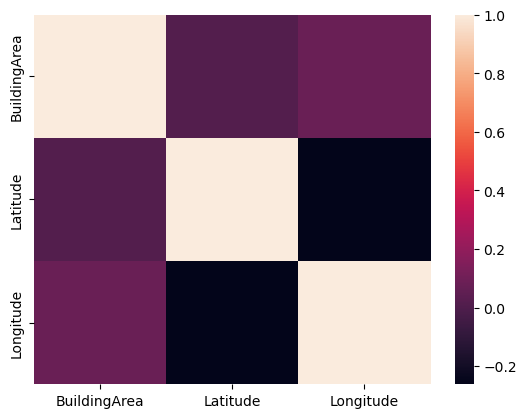

In [ ]:
# Visualise it for better judgement
sns.heatmap(corr)

In [ ]:
# ----------------------------------------------------------------------------------------------
# 3. Export the location wrangled data
# ----------------------------------------------------------------------------------------------

df.to_csv("../../data/processed/final_processed_data.csv", index=False)